### Exercise
Do the RBG mapping as in the lecture, but for a neuron grid which is a torus, i.e., one identifies the lower and upper bondaries, and the left and right boundaries. The meaning here is that, for instance, a 100x100 grid has points (i,0) and (i,99) as nearest neighbors and (0,j) and (99,j) as nearest neighbors.

### Imports

In [1]:
import numpy as np                             # numeric
import matplotlib.pyplot as plt                # plotting
from IPython.display import display, Image     # imported graphics
import matplotlib.cm as cm                     # contour plots 
from mpl_toolkits.mplot3d.axes3d import Axes3D # 3D plots

import sys # system library
sys.path.append('./neuralnets-in-raw-python/nn_book/docs/lib_nn') # lecture codes (my path)

from neural import * # import my library packages

Invoking __init__.py for neural


### Homework code

#### Define metric on a color space and a Gaussian proximity function on torus 

In [2]:
def dist3(p1,p2): 
    """
    Distance between points p1 and p2 in 3D 
    """
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2

In [3]:
def distT2(ix, iy, kx, ky, size):
    """
    Distance between points (ix, iy) and (kx, ky) on a torus
    """
    Dx = abs(ix - kx) if abs(ix - kx) <= size/2 else size - abs(ix - kx)
    Dy = abs(iy - ky) if abs(iy - ky) <= size/2 else size - abs(iy - ky)
    return Dx**2 + Dy**2    

In [4]:
def phi2(ix,iy,kx,ky,d,size):  # proximity function for torus
    return np.exp(-distT2(ix,iy,kx,ky,size)/(d**2))  # Gaussian

#### Random unit vector in color space

In [5]:
def rgbn():
    r,g,b=np.random.random(),np.random.random(),np.random.random() # random RGB
    norm=np.sqrt(r*r+g*g+b*b)                                      # norm
    return np.array([r,g,b]/norm)                                  # normalized RGB

#### Generate and plot ns random unit vectors (points) in color space; our input data

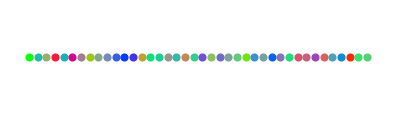

In [6]:
ns=40                            # number of colors in the sample
samp=[rgbn() for _ in range(ns)] # random sample

pls=plt.figure(figsize=(4,1),dpi=120)
plt.axis('off')

for i in range(ns): plt.scatter(i,0,color=samp[i], s=15)

plt.show()

#### Initialise vector field on size x size grid; our neurons

In [7]:
size=40                        # neuron array of size x size (40 x 40)
tab=np.zeros((size,size,3))    # create array tab with zeros  

for i in range(size):          # i index in the grid    
    for j in range(size):      # j index in the grid
        for k in range(3):     # RGB: k=0-red, 1-green, 2-blue
            tab[i,j,k]=np.random.random() # random number form [0,1]
            # 3 RGB components for neuron in the grid positin (i,j)

#### Run Kohonen algorithm

In [8]:
eps=.5   # initial parameters
de = 20  

In [9]:
for _ in range(150):    # rounds
    eps=eps*.995      
    de=de*.96           # de shrinks a bit faster than eps     
    for s in range(ns): # loop over the points in the data sample       
        p=samp[s]       # point from the sample
        dist=[[dist3(p,tab[i][j]) for j in range(size)] for i in range(size)] # distance of p from all neurons
        ind_min = np.argmin(dist) # the winner index
        ind_1=ind_min//size       # a trick to get a 2-dim index
        ind_2=ind_min%size 

        for j in range(size): 
            for i in range(size):
                tab[i][j]+=eps*phi2(ind_1,ind_2,i,j,de,size)*(p-tab[i][j]) # update       

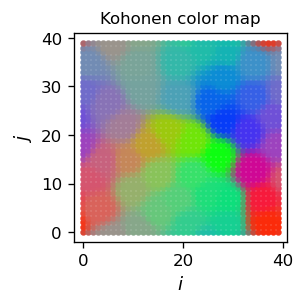

In [10]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Kohonen color map",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=tab[i][j], s=8)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11)
plt.show()